In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("accident_data.csv")


Display the first few rows of the dataset

In [3]:
data.head(10)

Date      Time  Latitude  Longitude Location Description  \
0  05-01-2022  15:30:00   40.7128   -74.0060              Highway   
1  10-02-2022  18:45:00   41.8781   -87.6298               Street   
2  15-03-2022  12:00:00   37.7749  -122.4194         Intersection   
3  20-04-2022  09:20:00   34.0522  -118.2437              Highway   
4  25-05-2022  17:10:00   40.7128   -74.0060               Street   
5  30-06-2022  14:30:00   41.8781   -87.6298         Intersection   
6  05-07-2022  20:15:00   34.0522  -118.2437               Street   
7  10-08-2022  12:45:00   40.7128   -74.0060              Highway   
8  15-09-2022  08:30:00   37.7749  -122.4194         Intersection   
9  20-10-2022  16:20:00   34.0522  -118.2437              Highway   

  Weather Conditions Road Conditions Visibility Accident Type Injury Severity  \
0              Foggy             Wet       Poor     Collision        Moderate   
1              Rainy             Wet       Poor      Rollover          Severe   
2              Clear             Dry      Clear     Collision        Moderate   
3              Clear             Dry      Clear     Collision           Minor   
4              Rainy             Wet       Poor     Collision          Severe   
5              Clear             Dry      Clear      Rollover           Minor   
6              Clear             Dry      Clear     Collision        Moderate   
7              Rainy             Wet       Poor      Rollover          Severe   
8              Clear             Dry      Clear     Collision        Moderate   
9              Clear             Dry      Clear     Collision           Minor   

  Contributing Factors Vehicle Type  No of Vehichles  Vehicle Speed  \
0             Speeding        Truck                1             45   
1        Drunk Driving   Motorcycle                1             40   
2              Weather          Car                2             25   
3                Other          Car                2             35   
4             Speeding          Car                1             50   
5   Distracted Driving        Truck                1             35   
6             Speeding          Car                2             40   
7        Drunk Driving   Motorcycle                1             30   
8              Weather          Car                2             35   
9                Other          Car                2             45   

  Day of Week      Month  Year  
0   Wednesday    January  2022  
1    Thursday   February  2022  
2     Tuesday      March  2022  
3   Wednesday      April  2022  
4   Wednesday        May  2022  
5    Thursday       June  2022  
6      Monday       July  2022  
7   Wednesday     August  2022  
8    Thursday  September  2022  
9   Wednesday    October  2022

**Summary statistics**

In [4]:
data.describe()

Latitude   Longitude  No of Vehichles  Vehicle Speed         Year
count  147.000000  147.000000       147.000000     147.000000   147.000000
mean    38.325525  -98.649265         1.428571      38.843537  2022.979592
std      3.197276   20.962406         0.496564       8.110285     0.823203
min     34.052200 -122.419400         1.000000      25.000000  2022.000000
25%     34.052200 -118.243700         1.000000      30.000000  2022.000000
50%     40.712800  -87.629800         1.000000      35.000000  2023.000000
75%     40.712800  -74.006000         2.000000      45.000000  2024.000000
max     41.878100  -74.006000         2.000000      55.000000  2024.000000

**Check for missing values**

In [5]:
data.isnull().sum()

Date                    0
Time                    0
Latitude                0
Longitude               0
Location Description    0
Weather Conditions      0
Road Conditions         0
Visibility              0
Accident Type           0
Injury Severity         0
Contributing Factors    0
Vehicle Type            0
No of Vehichles         0
Vehicle Speed           0
Day of Week             0
Month                   0
Year                    0
dtype: int64

In [11]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d-%m-%Y %H:%M:%S')


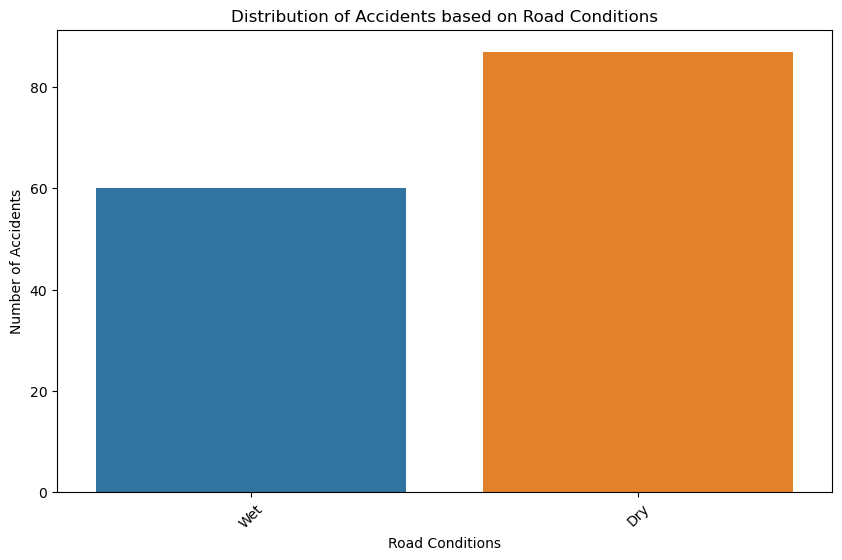

In [7]:
# Distribution of accidents based on road conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Road Conditions', data=data)
plt.title('Distribution of Accidents based on Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

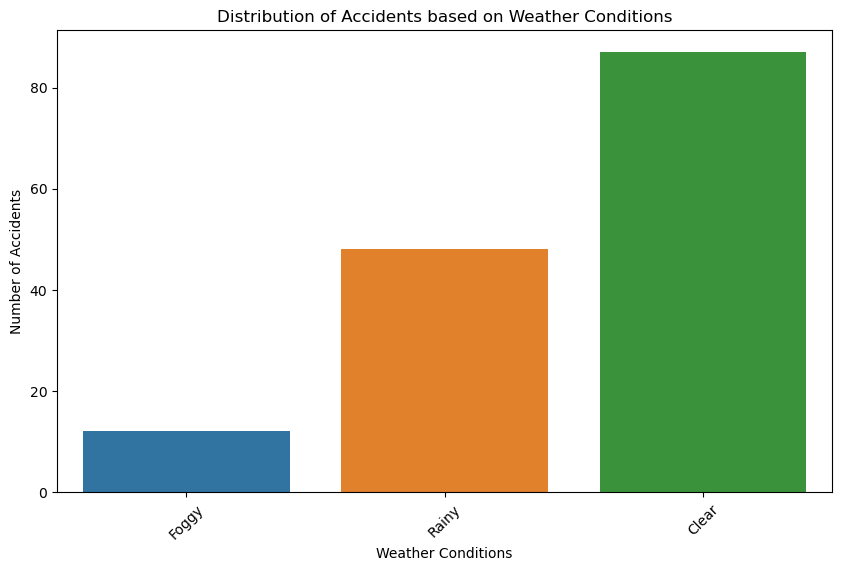

In [8]:
# Distribution of accidents based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather Conditions', data=data)
plt.title('Distribution of Accidents based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [9]:
data.index

RangeIndex(start=0, stop=147, step=1)

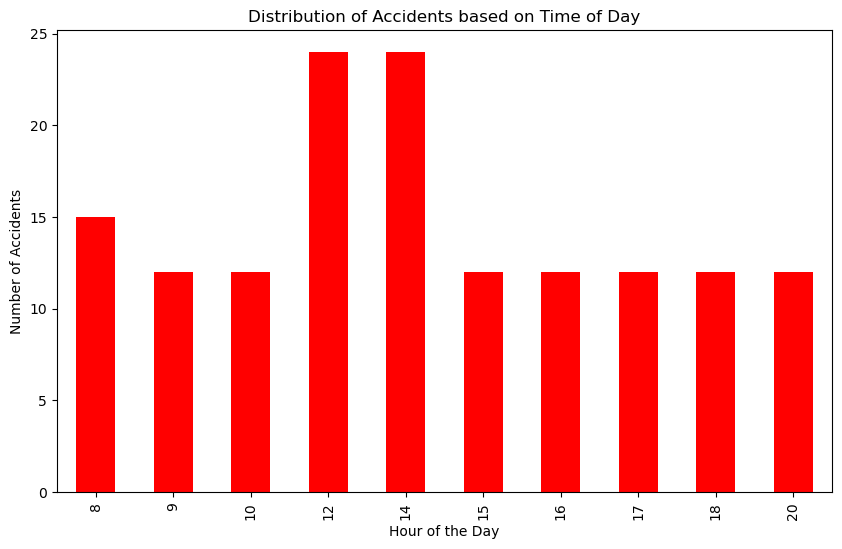

In [13]:
import matplotlib.pyplot as plt

# Set 'DateTime' as the index
data.set_index('DateTime', inplace=True)

plt.figure(figsize=(10, 6))
data.index.hour.value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Distribution of Accidents based on Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()


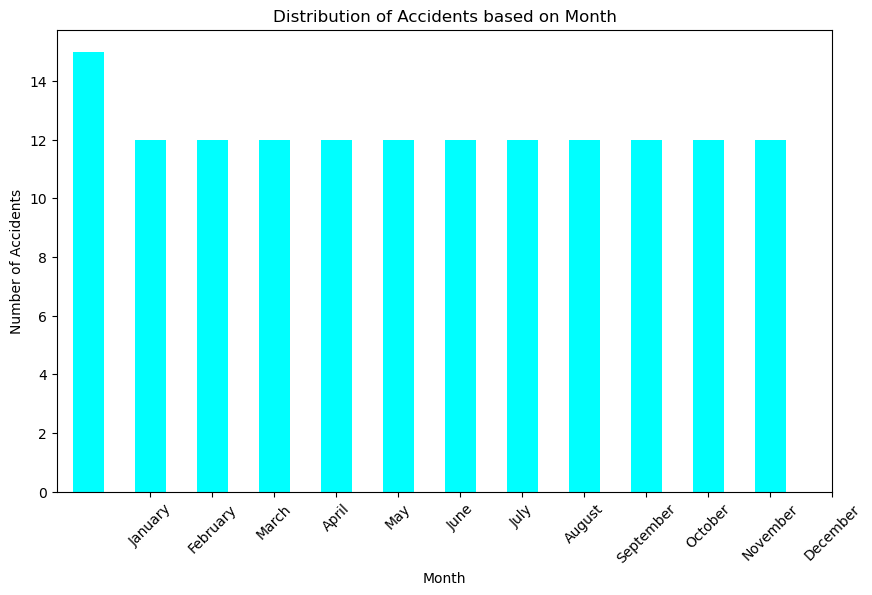

In [14]:
# Distribution of accidents based on month
plt.figure(figsize=(10, 6))
data.index.month.value_counts().sort_index().plot(kind='bar',color="cyan")
plt.title('Distribution of Accidents based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

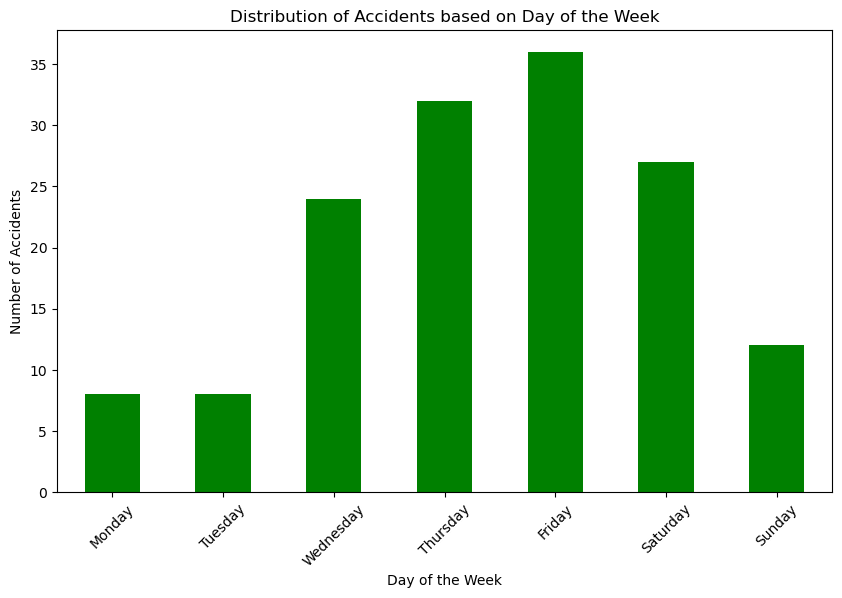

In [15]:
plt.figure(figsize=(10, 6))
data.index.dayofweek.value_counts().sort_index().plot(kind='bar',color = "green")
plt.title('Distribution of Accidents based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

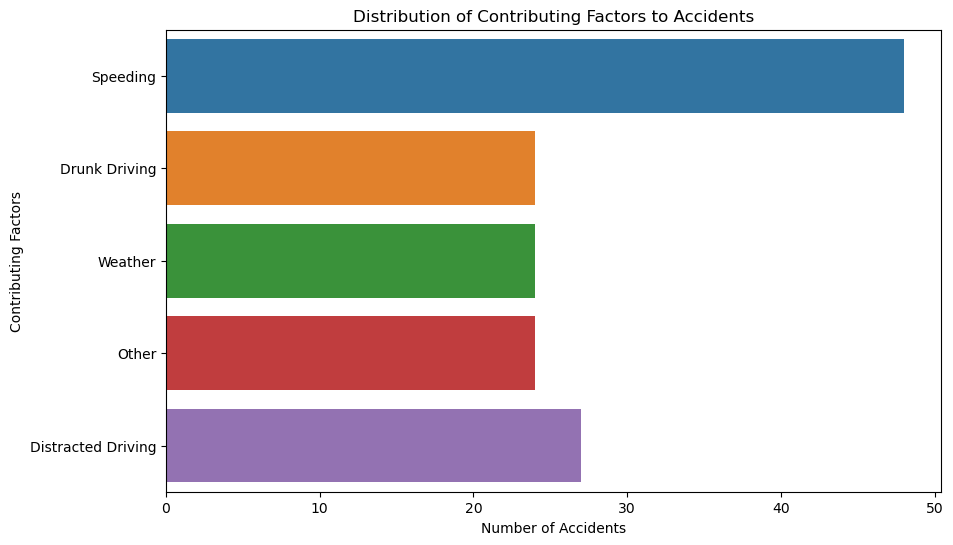

In [18]:
# Distribution of contributing factors
plt.figure(figsize=(10, 6))
sns.countplot(y='Contributing Factors', data=data)
plt.title('Distribution of Contributing Factors to Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factors')
plt.show()


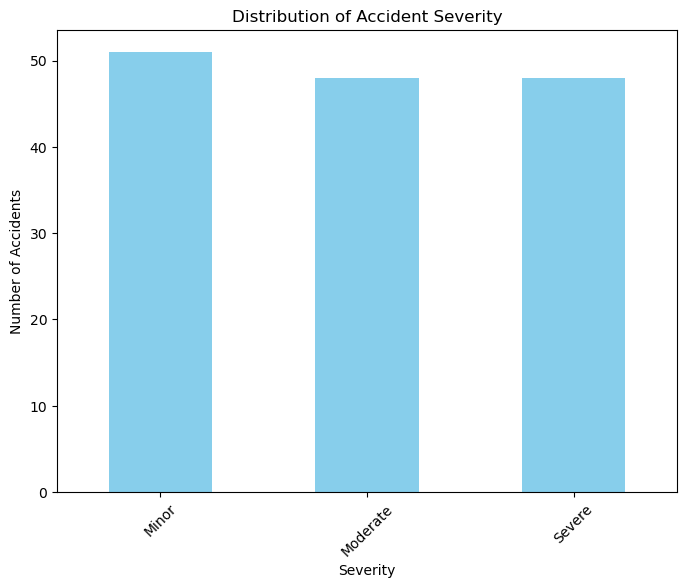

In [19]:
# Distribution of Accident Severity
plt.figure(figsize=(8, 6))
data['Injury Severity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

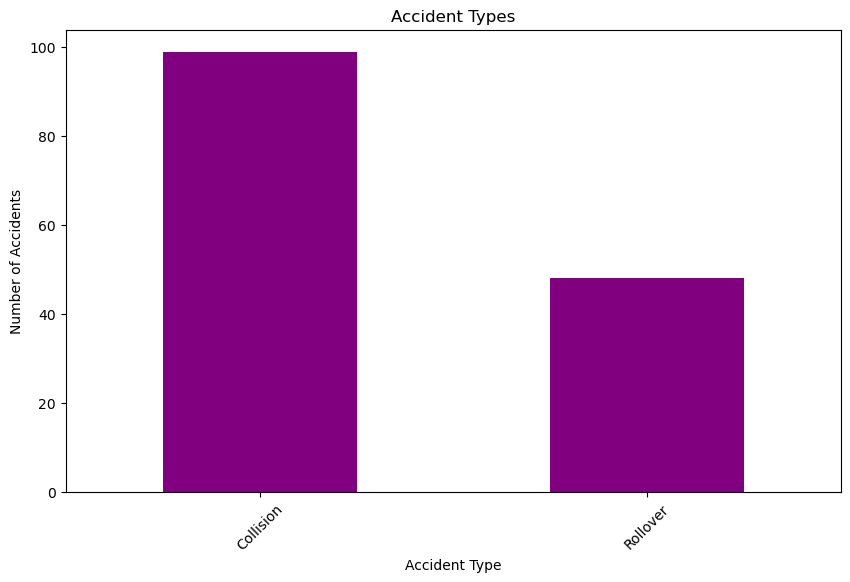

In [20]:
plt.figure(figsize=(10, 6))
data['Accident Type'].value_counts().plot(kind='bar', color='purple')
plt.title('Accident Types')
plt.xlabel('Accident Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

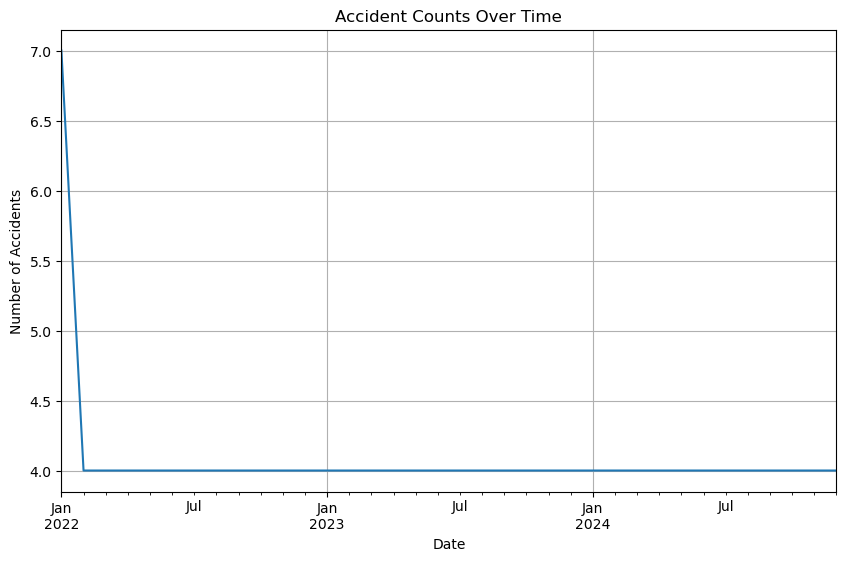

In [21]:
# Line Plot - Accident Counts Over Time
plt.figure(figsize=(10, 6))
data.resample('M').size().plot()
plt.title('Accident Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

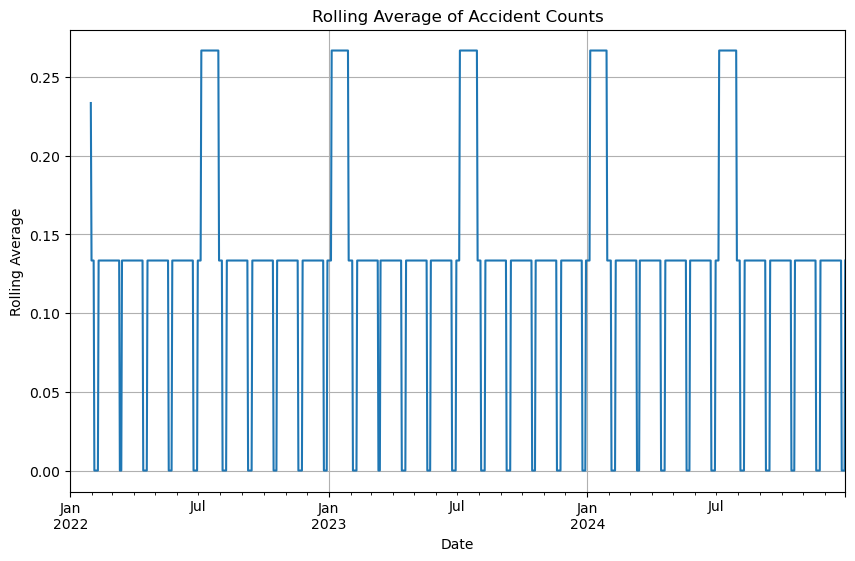

In [22]:
# Line Plot - Rolling Average of Accident Counts
plt.figure(figsize=(10, 6))
data.resample('D').size().rolling(window=30).mean().plot()
plt.title('Rolling Average of Accident Counts')
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.grid(True)
plt.show()

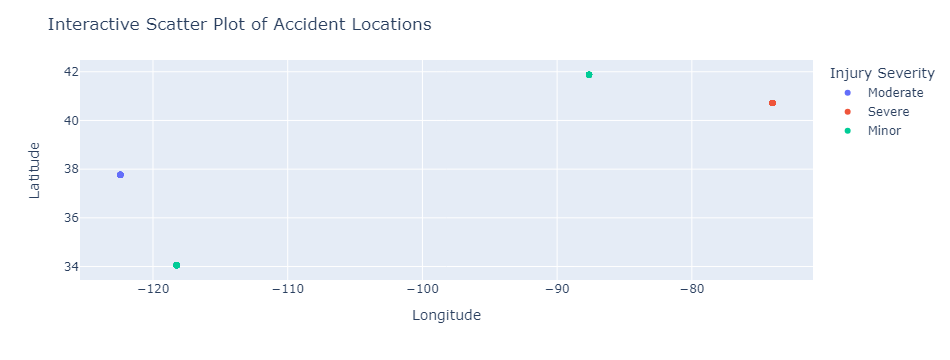

In [23]:
import plotly.express as px

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(data, x='Longitude', y='Latitude', color='Injury Severity', hover_data=['Location Description'])
fig.update_layout(title='Interactive Scatter Plot of Accident Locations',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')
fig.show()


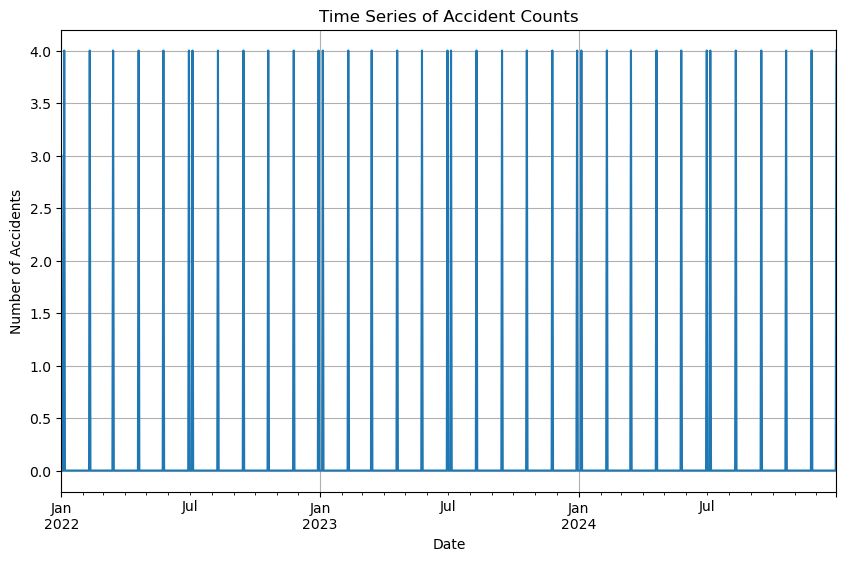

In [24]:
import matplotlib.pyplot as plt

# Convert the index to datetime if it's not already
data.index = pd.to_datetime(data.index)

# Plot time series of accident counts
plt.figure(figsize=(10, 6))
data.resample('D').size().plot()
plt.title('Time Series of Accident Counts')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


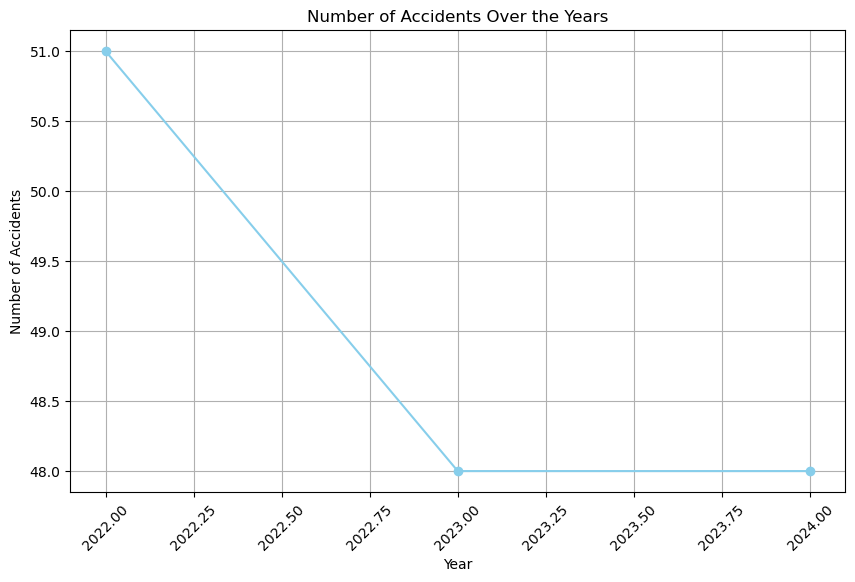

In [25]:
import matplotlib.pyplot as plt

# Extract year from the index
data['Year'] = data.index.year

# Count accidents by year
accidents_by_year = data['Year'].value_counts().sort_index()

# Plot accidents over the years (curve/line plot)
plt.figure(figsize=(10, 6))
accidents_by_year.plot(color='skyblue', marker='o', linestyle='-')
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
